Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Naive Bayes
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

%matplotlib inline

In [2]:
train_data = pd.read_csv('SalaryData_Train.csv')
test_data = pd.read_csv('SalaryData_Test.csv')

In [3]:
#copying the data
train1 = train_data.copy()
test1= test_data.copy()

In [4]:
train1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
test1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


## Data Exploration

In [6]:
train1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
test1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [9]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


## Duplicated Values

In [10]:
train1.shape

(30161, 14)

In [11]:
train1.duplicated().sum()

3258

In [12]:
train1[train1.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [13]:
train1.drop_duplicates(inplace=True)

In [14]:
train1.duplicated().sum()

0

## EDA

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'educationno'),
  Text(2.5, 0, 'capitalgain'),
  Text(3.5, 0, 'capitalloss'),
  Text(4.5, 0, 'hoursperweek')])

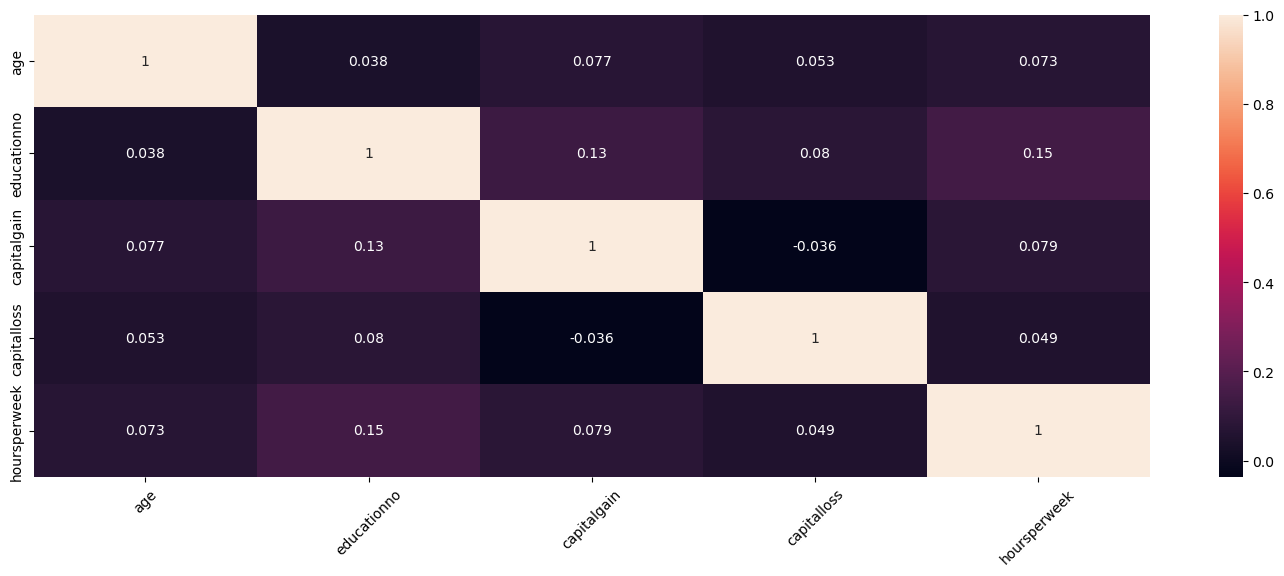

In [15]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(train1.corr(), annot=True);
plt.xticks(rotation=45)

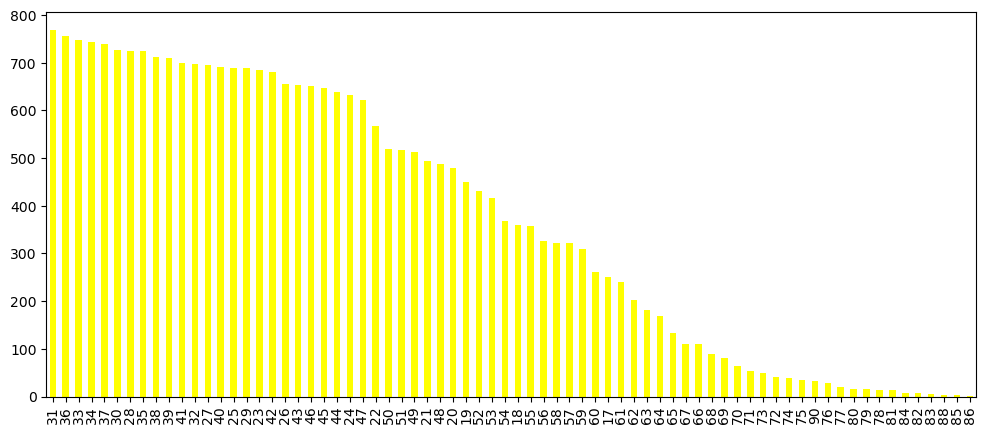

In [16]:
#Age
plt.figure(figsize=(12,5))
train1.age.value_counts().plot.bar(color='yellow');

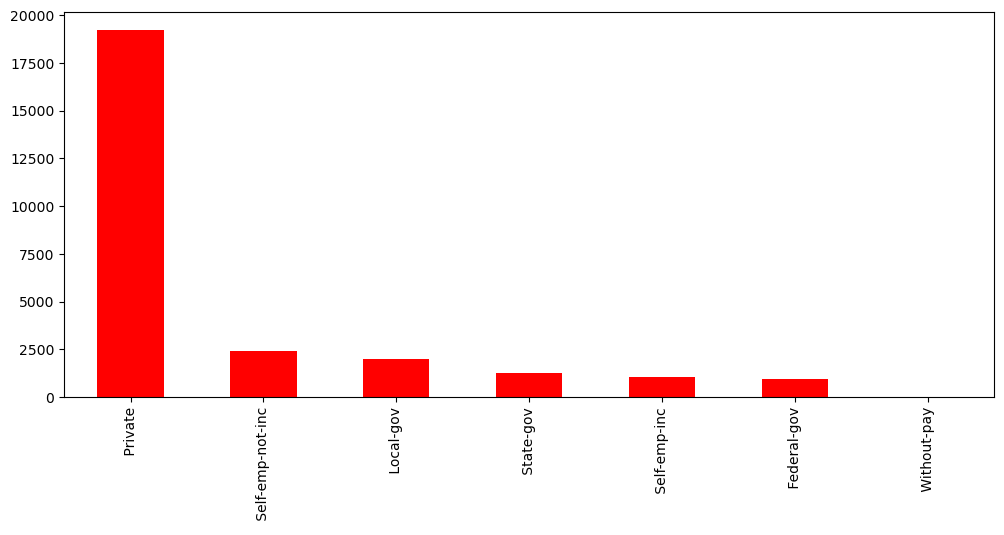

In [17]:
#workclass
plt.figure(figsize=(12,5))
train1.workclass.value_counts().plot.bar(color='red');

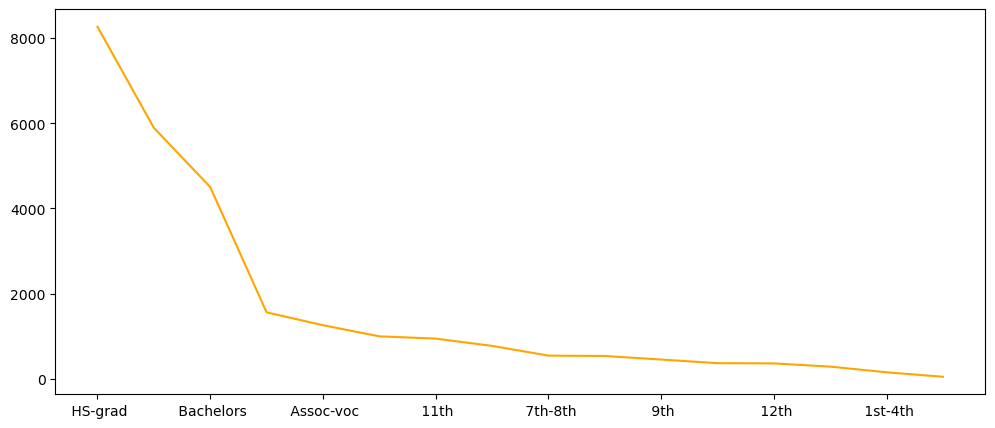

In [18]:
#education
plt.figure(figsize=(12,5))
train1.education.value_counts().plot.line(color='orange');

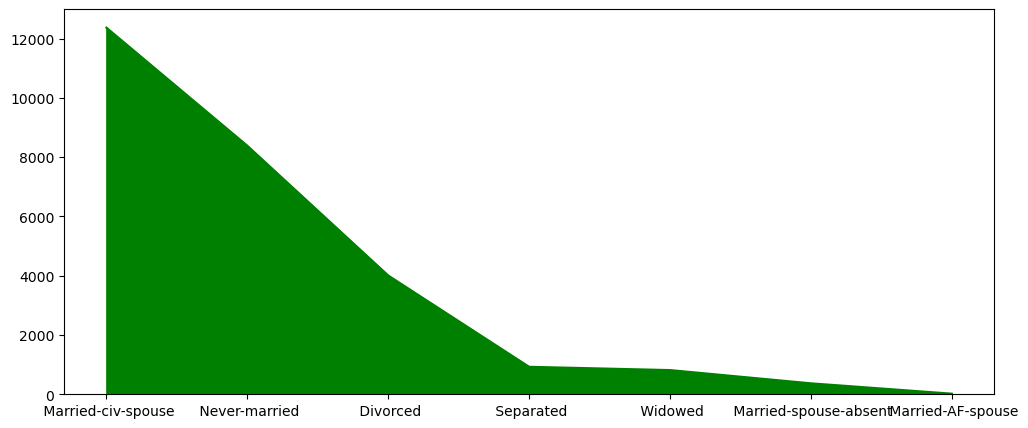

In [19]:
#maritial status
plt.figure(figsize=(12,5))
train1.maritalstatus.value_counts().plot.area(color='green');

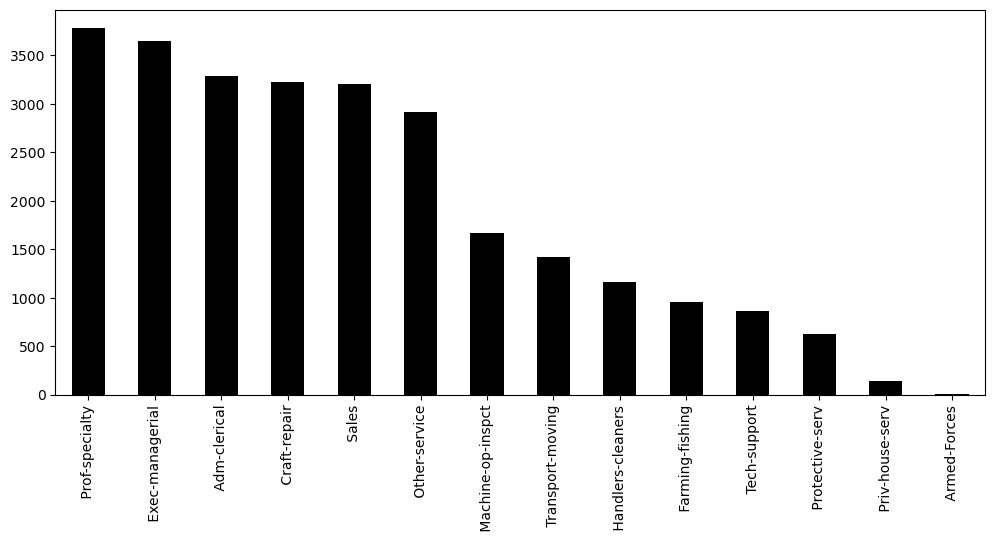

In [20]:
#occupation
plt.figure(figsize=(12,5))
train1.occupation.value_counts().plot.bar(color='black');

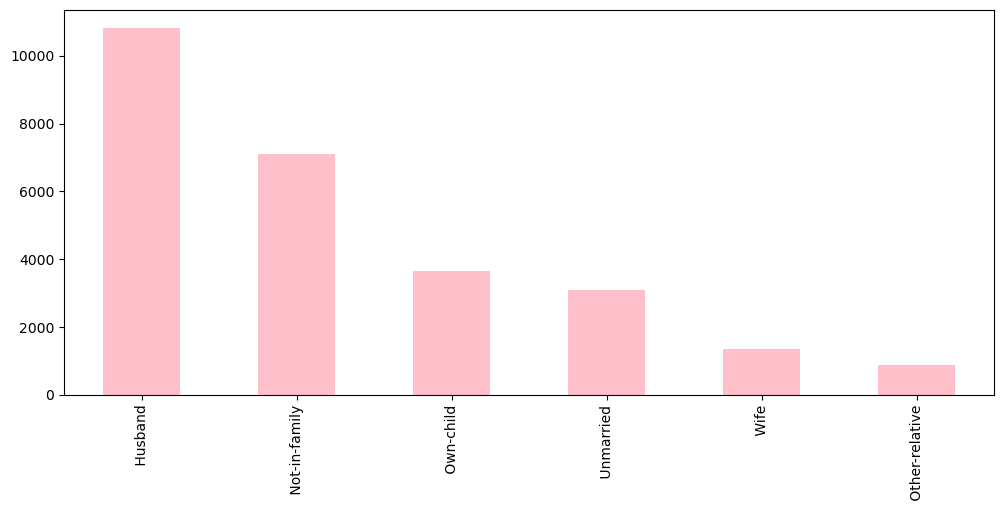

In [21]:
#relationship
plt.figure(figsize=(12,5))
train1.relationship.value_counts().plot.bar(color='pink');

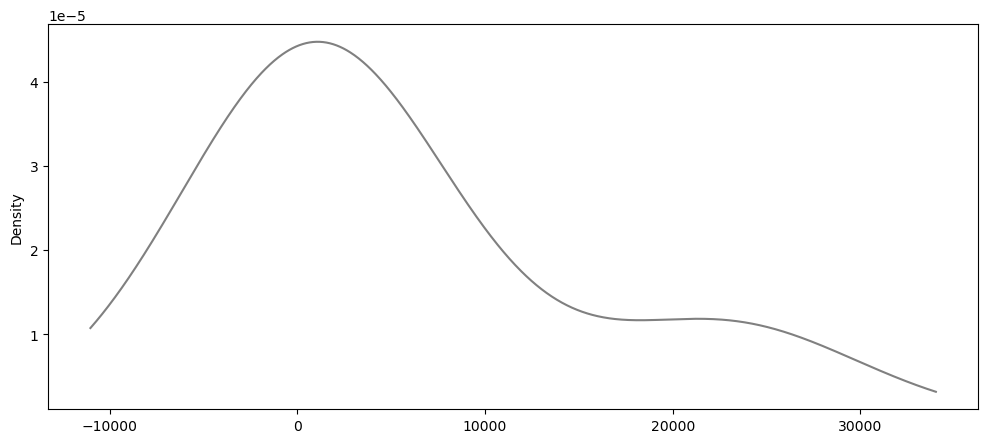

In [22]:
#race
plt.figure(figsize=(12,5))
train1.race.value_counts().plot.density(color='grey');

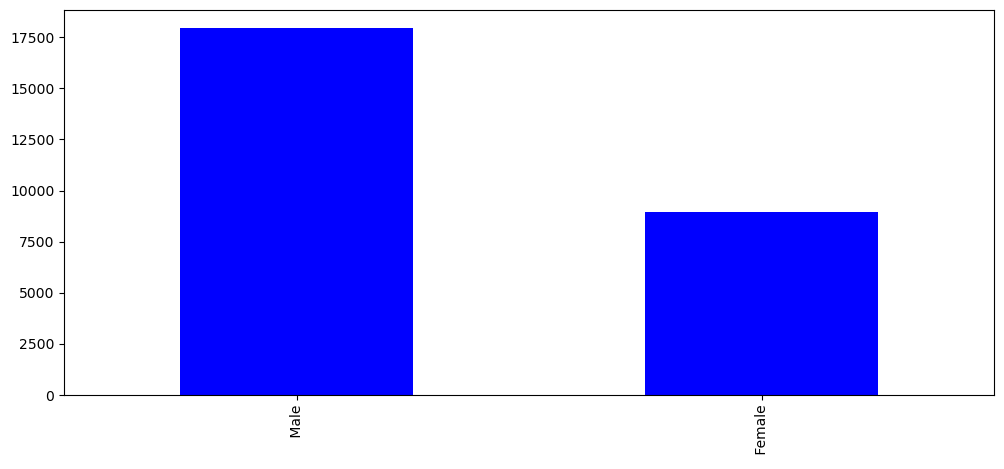

In [23]:
#sex
plt.figure(figsize=(12,5))
train1.sex.value_counts().plot.bar(color='blue');

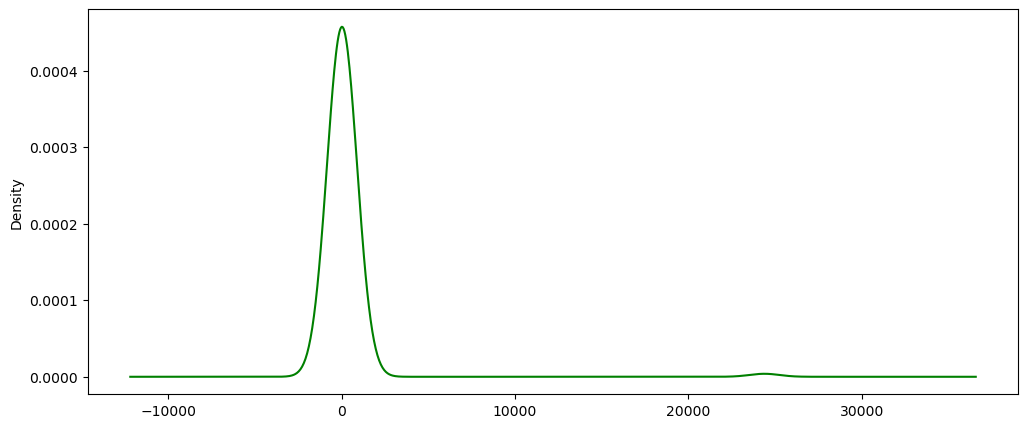

In [24]:
#capitalgain
plt.figure(figsize=(12,5))
train1.capitalgain.value_counts().plot.density(color='green');

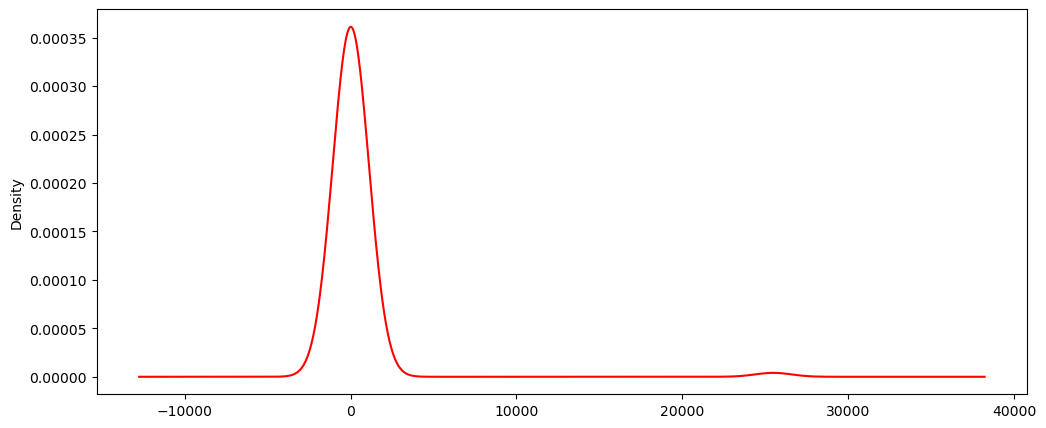

In [25]:
#capitalloss
plt.figure(figsize=(12,5))
train1.capitalloss.value_counts().plot.density(color='red');

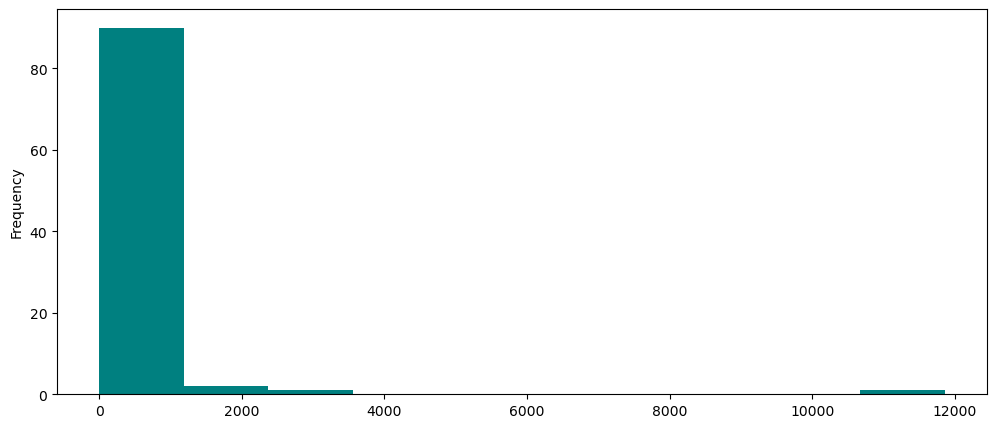

In [26]:
#hoursperweek
plt.figure(figsize=(12,5))
train1.hoursperweek.value_counts().plot.hist(color='teal');

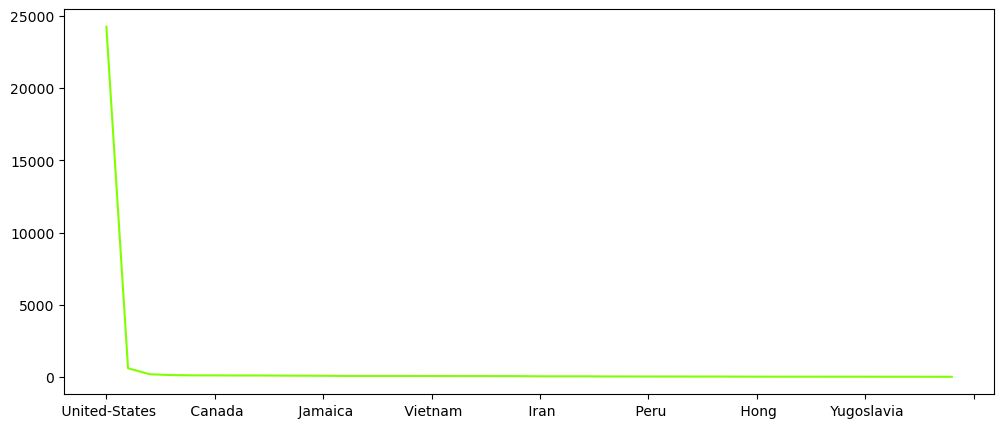

In [27]:
#native
plt.figure(figsize=(12,5))
train1.native.value_counts().plot.line(color='Chartreuse');

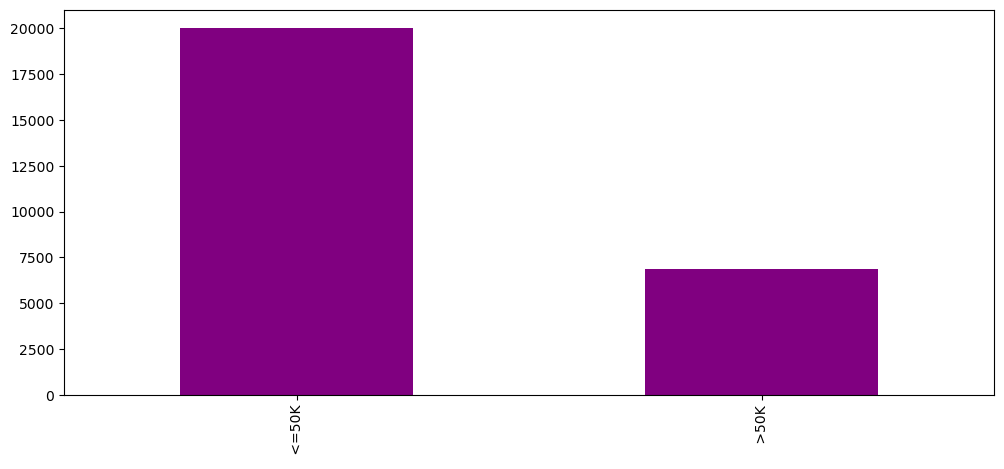

In [28]:
#salary
plt.figure(figsize=(12,5))
train1.Salary.value_counts().plot.bar(color='purple');

In [29]:
print(train1.shape)
print(test1.shape)

(26903, 14)
(15060, 14)


one hot encoding

In [30]:
tr1 = train1.iloc[:,0:13]

tr1 = pd.get_dummies(tr1)
tr1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,14,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30155,22,10,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
te1 = test1.iloc[:,0:13]

te1 = pd.get_dummies(te1)
te1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
train1['Salary'] = train_data.Salary
train1['Salary'] = np.where(train1['Salary'].str.contains(" >50K"), 1, 0)
train1.head()

test1['Salary'] = test_data.Salary
test1['Salary'] = np.where(test1['Salary'].str.contains(" >50K"), 1, 0)
test1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [33]:
#train data concat
finaltrain = pd.concat([tr1, train1['Salary']],axis=1)
finaltrain

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,14,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
30155,22,10,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [34]:
#test data concat
finaltest = pd.concat([te1, test1['Salary']],axis=1)
finaltest

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
15056,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
15057,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
15058,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


Splitting the dataset

In [35]:
 # Finaltrain data
x_train = finaltrain.values[:,0:102]
y_train = finaltrain.values[:,102]

#Finaltest data
x_test = finaltest.values[:,0:102]
y_test = finaltest.values[:,102]

In [36]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape 

((26903, 102), (15060, 102), (26903,), (15060,))

## Naive Bayes Model

In [37]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()

In [38]:
clf.fit(x_train, y_train)

CategoricalNB()

In [39]:
y_train_pred = clf.predict(x_train)
accuracy_train = np.mean(y_train_pred==y_train)

In [40]:
x_test_pred = clf.predict(x_test)
accuracy_test = np.mean(x_test_pred==y_test)

In [41]:
print('Training accuracy is:',accuracy_train)

Training accuracy is: 0.8293870572055161


In [42]:
print('Testing accuracy is:',accuracy_test)

Testing accuracy is: 0.8284860557768924


## Gaussian Naive Bayes

In [43]:
classifier_gb = GB()
classifier_gb.fit(x_train,y_train) 
# we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(x_train)
accuracy_train_g = np.mean(train_pred_g==y_train)

In [44]:
test_pred_g = classifier_gb.predict(x_test)
accuracy_test_g = np.mean(test_pred_g==y_test)

In [45]:
print('Training accuracy is:',accuracy_train_g)
print('Testing accuracy is:',accuracy_test_g)

Training accuracy is: 0.8023640486191131
Testing accuracy is: 0.802058432934927
